Importing libraries  

In [1]:
#python libraries

import pandas as a
import seaborn as s
import numpy as n
import matplotlib.pyplot as p

#machine learning libraries
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

p.rcParams["axes.labelsize"] = 18

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Loading the dataset

In [3]:
#importing the dataset
T=a.read_csv('Train.csv')
S=a.read_csv('SampleSubmission.csv')
V=a.read_csv('VariableDefinitions.csv')
Te=a.read_csv('Test.csv')

In [5]:
print(' The train data shape:',T.shape)
print(' The test data shape:',Te.shape)
print(' The ss data shape:', S.shape)

 The train data shape: (23524, 13)
 The test data shape: (10086, 12)
 The ss data shape: (33610, 2)


In [6]:
T.info

<bound method DataFrame.info of       country  year       uniqueid bank_account location_type  \
0       Kenya  2018     uniqueid_1          Yes         Rural   
1       Kenya  2018     uniqueid_2           No         Rural   
2       Kenya  2018     uniqueid_3          Yes         Urban   
3       Kenya  2018     uniqueid_4           No         Rural   
4       Kenya  2018     uniqueid_5           No         Urban   
...       ...   ...            ...          ...           ...   
23519  Uganda  2018  uniqueid_2113           No         Rural   
23520  Uganda  2018  uniqueid_2114           No         Rural   
23521  Uganda  2018  uniqueid_2115           No         Rural   
23522  Uganda  2018  uniqueid_2116           No         Urban   
23523  Uganda  2018  uniqueid_2117           No         Rural   

      cellphone_access  household_size  age_of_respondent  \
0                  Yes               3                 24   
1                   No               5                 70   
2   

In [7]:
T.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
T.isna()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False


/tmp/ipykernel_7920/2347491194.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s.catplot(x="bank_account",kind ="count", data=T ,palette='Set1')


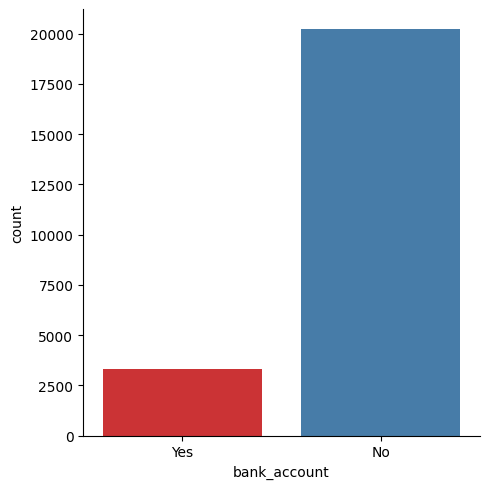

In [10]:
s.catplot(x="bank_account",kind ="count", data=T ,palette='Set1')

/tmp/ipykernel_7920/253740207.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s.catplot(x="relationship_with_head",kind ="count", data=T ,palette='Set1')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

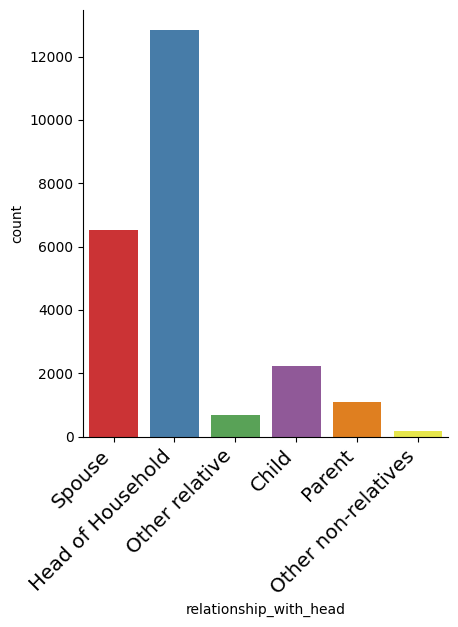

In [12]:
s.catplot(x="relationship_with_head",kind ="count", data=T ,palette='Set1')
p.xticks(
    rotation = 45,
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'x-large'
)

In [13]:
#importing processuing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#convrt target label to numerical data
le = LabelEncoder()
T['bank_account'] = le.fit_transform(T['bank_account'])


#separate training features from target
x_T = T.drop(['bank_account'], axis=1)
y_T= T['bank_account']
print(y_T)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64
